In [2]:
# basics
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import tables
from matplotlib import rc, rcParams
import numpy as np
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

## Make Histograms to compare Data MC

In [27]:
# define bins
costh_edges = np.array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,0.1])
energy_proxy_edges = np.array([  1.00000000e+02,   1.25892541e+02,   1.58489319e+02,
                                 1.99526231e+02,   2.51188643e+02,   3.16227766e+02,
                                 3.98107171e+02,   5.01187234e+02,   6.30957344e+02,
                                 7.94328235e+02,   1.00000000e+03,   1.25892541e+03,
                                 1.58489319e+03,   1.99526231e+03,   2.51188643e+03,
                                 3.16227766e+03,   3.98107171e+03,   5.01187234e+03,
                                 6.30957344e+03,   7.94328235e+03,   1.00000000e+04,
                                 1.25892541e+04,   1.58489319e+04,   1.99526231e+04,
                                 2.51188643e+04,   3.16227766e+04,   3.98107171e+04,
                                 5.01187234e+04,   6.30957344e+04,   7.94328235e+04,
                                 1.00000000e+05,   1.25892541e+05,   1.58489319e+05,
                                 1.99526231e+05,   2.51188643e+05,   3.16227766e+05,
                                 3.98107171e+05,   5.01187234e+05,   6.30957344e+05,
                                 7.94328235e+05,   1.00000000e+06,   1.25892541e+06,
                                 1.58489319e+06,   1.99526231e+06,   2.51188643e+06,
                                 3.16227766e+06,   3.98107171e+06,   5.01187234e+06,
                                 6.30957344e+06,   7.94328235e+06,   1.00000000e+07])
costh_centers = np.array([(costh_edges[i+1]+costh_edges[i])/2. for i in range(len(costh_edges)-1)])
energy_proxy_centers = np.array([(energy_proxy_edges[i+1]+energy_proxy_edges[i])/2. for i in range(len(energy_proxy_edges)-1)])

In [28]:
data = np.genfromtxt("../../IC86OfficialRelease/simple_corrected_data_release.dat")

In [29]:
expectation = np.genfromtxt("../expectation/nusquids_flux_expectation.dat")
expectation_chris_given = np.genfromtxt("../expectation/chris_flux_expectation.dat")

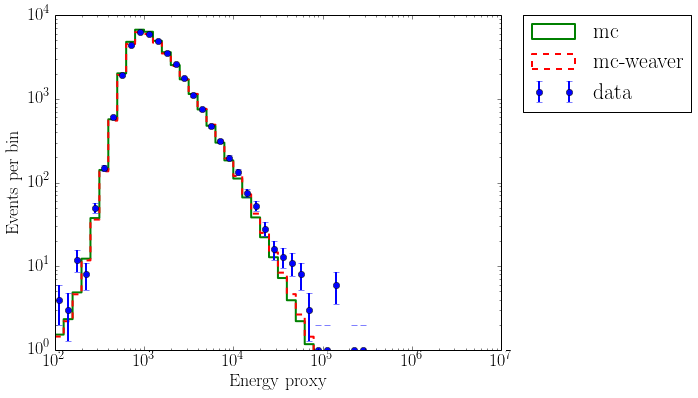

In [30]:
plt.figure(figsize = (8,6))
obs,edges = np.histogram(data[:,0], bins = energy_proxy_edges)
plt.errorbar(energy_proxy_centers, obs, yerr=np.sqrt(obs), fmt='o',
         lw = 2, color = "blue", label = "data")
plt.hist(expectation[:,0], bins = energy_proxy_edges, weights = expectation[:,-1],
         histtype='step', lw = 2, color = "green", label = "mc")
plt.hist(expectation_chris_given[:,0], bins = energy_proxy_edges, weights = expectation_chris_given[:,-1],
         histtype='step', lw = 2, color = "red", ls = "dashed", label = "mc-weaver")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.loglog()
plt.ylim(1,1.0e4)
plt.xlabel("Energy proxy")
plt.ylabel("Events per bin")

(0, 8000)

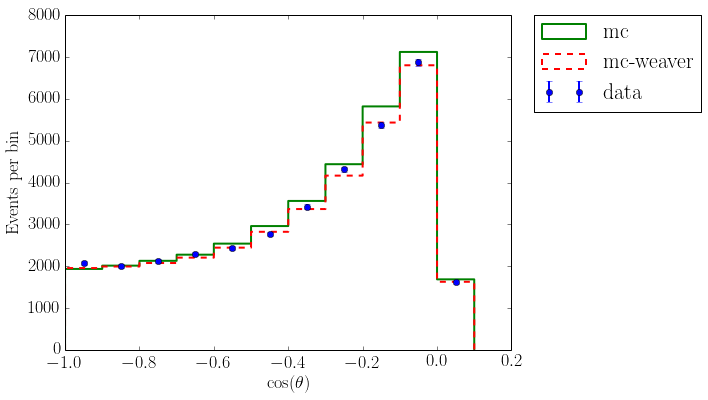

In [31]:
plt.figure(figsize = (8,6))
obs,edges = np.histogram(data[:,1], bins = costh_edges)
plt.errorbar(costh_centers, obs, yerr=np.sqrt(obs), fmt='o',
         lw = 2, color = "blue", label = "data")
plt.hist(expectation[:,1], bins = costh_edges, weights = expectation[:,-1],
         histtype='step', lw = 2, color = "green", label = "mc")
plt.hist(expectation_chris_given[:,1], bins = costh_edges, weights = expectation_chris_given[:,-1],
         histtype='step', lw = 2, color = "red", ls = "dashed", label = "mc-weaver")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Events per bin")
plt.ylim(0,8000)

## Simple LLH Calculation

In [151]:
# stuff
from scipy.stats import poisson,norm

### Adding the years together

### Adding the years together

In [142]:
expectation_fitted = np.genfromtxt("../expectation.dat")

In [150]:
datahistogram,e1,e2 = np.histogram2d(data[:,0],data[:,1],
                                     bins = [energy_proxy_edges,costh_edges])
expectationhistogram,e1,e2 = np.histogram2d(expectation_fitted[:,0],expectation_fitted[:,1], 
                                            bins = [energy_proxy_edges,costh_edges], 
                                            weights = expectation_fitted[:,-1])

In [148]:
data[:,2]

array([ 2010.,  2010.,  2010., ...,  2011.,  2011.,  2011.])

In [144]:
print "reduced energy range"
e1[7:34], len(e1[7:34])

reduced energy range


(array([    501.187234,     630.957344,     794.328235,    1000.      ,
           1258.92541 ,    1584.89319 ,    1995.26231 ,    2511.88643 ,
           3162.27766 ,    3981.07171 ,    5011.87234 ,    6309.57344 ,
           7943.28235 ,   10000.      ,   12589.2541  ,   15848.9319  ,
          19952.6231  ,   25118.8643  ,   31622.7766  ,   39810.7171  ,
          50118.7234  ,   63095.7344  ,   79432.8235  ,  100000.      ,
         125892.541   ,  158489.319   ,  199526.231   ]), 27)

In [145]:
LogLikelihood = np.sum([np.sum(map(lambda args:poisson.logpmf(*args),zip(datahistogram[epi],expectationhistogram[epi])))
                 for epi in range(7,34)])
SaturatedLikelihood = np.sum([np.sum(map(lambda args:np.nan_to_num(poisson.logpmf(*args)),zip(datahistogram[epi],datahistogram[epi])))
                 for epi in range(7,34)])
print "Chi2=" + str(np.abs(2.*(LogLikelihood-SaturatedLikelihood)))
print "DOF=" + str(len(range(7,34))*(len(e2)-1))

Chi2=355.746026718
DOF=297


In [146]:
LogLikelihood

-763.12296237491398

In [147]:
SaturatedLikelihood

-585.24994901587024

### Keeping the years separate

In [176]:
data2010 = np.array([d for d in data if d[2] == 2010])
expectation2010 = np.array([d for d in expectation if d[2] == 2010])

datahistogram2010,e1,e2 = np.histogram2d(data2010[:,0],data2010[:,1],
                                     bins = [energy_proxy_edges,costh_edges])
expectationhistogram2010,e1,e2 = np.histogram2d(expectation2010[:,0],expectation2010[:,1], 
                                            bins = [energy_proxy_edges,costh_edges], 
                                            weights = expectation2010[:,-1])

data2011 = np.array([d for d in data if d[2] == 2011])
expectation2011 = np.array([d for d in expectation if d[2] == 2011])

datahistogram2011,e1,e2 = np.histogram2d(data2011[:,0],data2011[:,1],
                                     bins = [energy_proxy_edges,costh_edges])
expectationhistogram2011,e1,e2 = np.histogram2d(expectation2011[:,0],expectation2011[:,1], 
                                            bins = [energy_proxy_edges,costh_edges], 
                                            weights = expectation2011[:,-1])

In [177]:
LogLikelihood = np.sum([np.sum(map(lambda args:poisson.logpmf(*args),zip(datahistogram2010[epi],expectationhistogram2010[epi])))
                 for epi in range(7,34)])
LogLikelihood += np.sum([np.sum(map(lambda args:poisson.logpmf(*args),zip(datahistogram2011[epi],expectationhistogram2011[epi])))
                 for epi in range(7,34)])

SaturatedLikelihood = np.sum([np.sum(map(lambda args:np.nan_to_num(poisson.logpmf(*args)),zip(datahistogram2010[epi],datahistogram2010[epi])))
                 for epi in range(7,34)])
SaturatedLikelihood += np.sum([np.sum(map(lambda args:np.nan_to_num(poisson.logpmf(*args)),zip(datahistogram2011[epi],datahistogram2011[epi])))
                 for epi in range(7,34)])

print "Chi2=" + str(np.abs(2.*(LogLikelihood-SaturatedLikelihood)))
print "DOF=" + str(len(range(7,34))*(len(e2)-1)*2)

Chi2=741.762946021
DOF=594


In [178]:
LogLikelihood

-1374.2449016621297

In [179]:
SaturatedLikelihood

-1003.3634286517693

## Compare nuSQuIDS Flux versus Chris-given Flux

In [2]:
# includes
import nuSQUIDSpy as nsq
import tables
import scipy.interpolate as interpolate
import scipy.integrate as integrate

In [3]:
kaon = nsq.nuSQUIDSAtm("../nusquids_fluxes/nusquids_kaon_HondaGaisser.hdf5")

In [4]:
pion = nsq.nuSQUIDSAtm("../nusquids_fluxes/nusquids_pion_HondaGaisser.hdf5")

In [5]:
kaon_flux = np.array([ kaon.EvalFlavor(1,-1,EE,0) for EE in kaon.GetERange()])
pion_flux = np.array([ pion.EvalFlavor(1,-1,EE,0) for EE in kaon.GetERange()])
flux = kaon_flux*1.2+pion_flux

[]

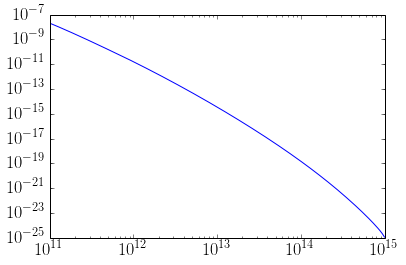

In [6]:
plt.plot(kaon.GetERange(),flux)
plt.loglog()

In [7]:
# weaver flux
weaver_flux = tables.open_file("../conventional_flux.h5", driver="H5FD_CORE")

In [8]:
weaver_flux.root.nu_mu.integrated_flux[:,0][0]

1.4140311346582058e-07

In [25]:
2.*np.pi*0.1

0.6283185307179586

In [11]:
e_edges = weaver_flux.root.nu_mu.bin_edges_0[:]
integrated_fluxes = 2.*np.pi*0.1*np.array([integrate.quad(interpolate.interp1d(kaon.GetERange()/1.0e9,flux),e_edges[i],e_edges[i+1]) for i in range(0,60)]) 

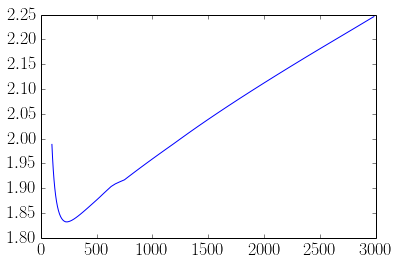

In [12]:
plt.plot(weaver_flux.root.nu_mu.bin_edges_0[0:60],
         weaver_flux.root.nu_mu.integrated_flux[:,0][0:60]/integrated_fluxes[:,0])

In [21]:
weaver_flux.root.nu_mu.bin_edges_1[:]

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1])

In [27]:
weaver_flux.root.nu_mu.bin_edges_0[:]

array([  1.00000000e+02,   1.05925373e+02,   1.12201845e+02,
         1.18850223e+02,   1.25892541e+02,   1.33352143e+02,
         1.41253754e+02,   1.49623566e+02,   1.58489319e+02,
         1.67880402e+02,   1.77827941e+02,   1.88364909e+02,
         1.99526231e+02,   2.11348904e+02,   2.23872114e+02,
         2.37137371e+02,   2.51188643e+02,   2.66072506e+02,
         2.81838293e+02,   2.98538262e+02,   3.16227766e+02,
         3.34965439e+02,   3.54813389e+02,   3.75837404e+02,
         3.98107171e+02,   4.21696503e+02,   4.46683592e+02,
         4.73151259e+02,   5.01187234e+02,   5.30884444e+02,
         5.62341325e+02,   5.95662144e+02,   6.30957344e+02,
         6.68343918e+02,   7.07945784e+02,   7.49894209e+02,
         7.94328235e+02,   8.41395142e+02,   8.91250938e+02,
         9.44060876e+02,   1.00000000e+03,   1.05925373e+03,
         1.12201845e+03,   1.18850223e+03,   1.25892541e+03,
         1.33352143e+03,   1.41253754e+03,   1.49623566e+03,
         1.58489319e+03,